# XGBoost

In [ ]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [ ]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier(random_state=1234)

xgboost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [ ]:
# 모델 적합
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(df_train_x)
# 모델 평가
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(df_test_x)
# 모델 평가
eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[1021    0]
 [  58   46]] 

정확도: 0.9484
정밀도: 1.0000
재현율: 0.4423
F1    : 0.6133
AUC   : 0.7212


In [ ]:
# 사용자 모델 생성
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=1234)
# 모델 적합
xgboost_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))


# 예측 및 모델 평가:Test  
xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[2382    0]
 [  48  193]] 

정확도: 0.9817
정밀도: 1.0000
재현율: 0.8008
F1    : 0.8894
AUC   : 0.9004

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2382
           1       1.00      0.80      0.89       241

    accuracy                           0.98      2623
   macro avg       0.99      0.90      0.94      2623
weighted avg       0.98      0.98      0.98      2623


 사용자 모델 평가 : Test 

오차행렬:
 [[1020    1]
 [  65   39]] 

정확도: 0.9413
정밀도: 0.9750
재현율: 0.3750
F1    : 0.5417
AUC   : 0.6870

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.97      0.38      0.54       104

    accuracy                           0.94      1125
   macro avg       0.96      0.69      0.76      1125
weighted avg       0.94      0.94      0.93      1125



In [ ]:
# sklearn XGBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=1234)
xgb_stop.fit(df_train_x, df_train_y, early_stopping_rounds = 150, 
                eval_metric="logloss", eval_set = eval_df, verbose=True)

[0]	validation_0-logloss:0.62092
[1]	validation_0-logloss:0.56184
[2]	validation_0-logloss:0.51341
[3]	validation_0-logloss:0.47230
[4]	validation_0-logloss:0.43716
[5]	validation_0-logloss:0.40648
[6]	validation_0-logloss:0.38075
[7]	validation_0-logloss:0.35740
[8]	validation_0-logloss:0.33736
[9]	validation_0-logloss:0.32025
[10]	validation_0-logloss:0.30528
[11]	validation_0-logloss:0.29236
[12]	validation_0-logloss:0.28106
[13]	validation_0-logloss:0.27113
[14]	validation_0-logloss:0.26233
[15]	validation_0-logloss:0.25407
[16]	validation_0-logloss:0.24520
[17]	validation_0-logloss:0.23947
[18]	validation_0-logloss:0.23388
[19]	validation_0-logloss:0.22930
[20]	validation_0-logloss:0.22485
[21]	validation_0-logloss:0.22028
[22]	validation_0-logloss:0.21723
[23]	validation_0-logloss:0.21451
[24]	validation_0-logloss:0.21211
[25]	validation_0-logloss:0.20965
[26]	validation_0-logloss:0.20786
[27]	validation_0-logloss:0.20611
[28]	validation_0-logloss:0.20390
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [ ]:
# 최적 모델 정보 확인
print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score)  

최적 횟수: 81
최적 성능(0-LogLoss): 0.18741312153378709


In [ ]:
# 최적 모델 평가
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1019    2]
 [  63   41]] 

정확도: 0.9422
정밀도: 0.9535
재현율: 0.3942
F1    : 0.5578
AUC   : 0.6961

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.95      0.39      0.56       104

    accuracy                           0.94      1125
   macro avg       0.95      0.70      0.76      1125
weighted avg       0.94      0.94      0.93      1125



{'LOAN': 486.0, 'MORTDUE': 471.0, 'VALUE': 538.0, 'YOJ': 398.0, 'DEROG': 104.0, 'DELINQ': 198.0, 'CLAGE': 542.0, 'NINQ': 182.0, 'CLNO': 425.0, 'DEBTINC': 593.0, 'REASON_DebtCon': 63.0, 'JOB_Mgr': 19.0, 'JOB_OTHER': 5.0, 'JOB_Office': 46.0, 'JOB_Other': 66.0, 'JOB_ProfExe': 26.0, 'JOB_Sales': 63.0, 'JOB_Self': 2.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

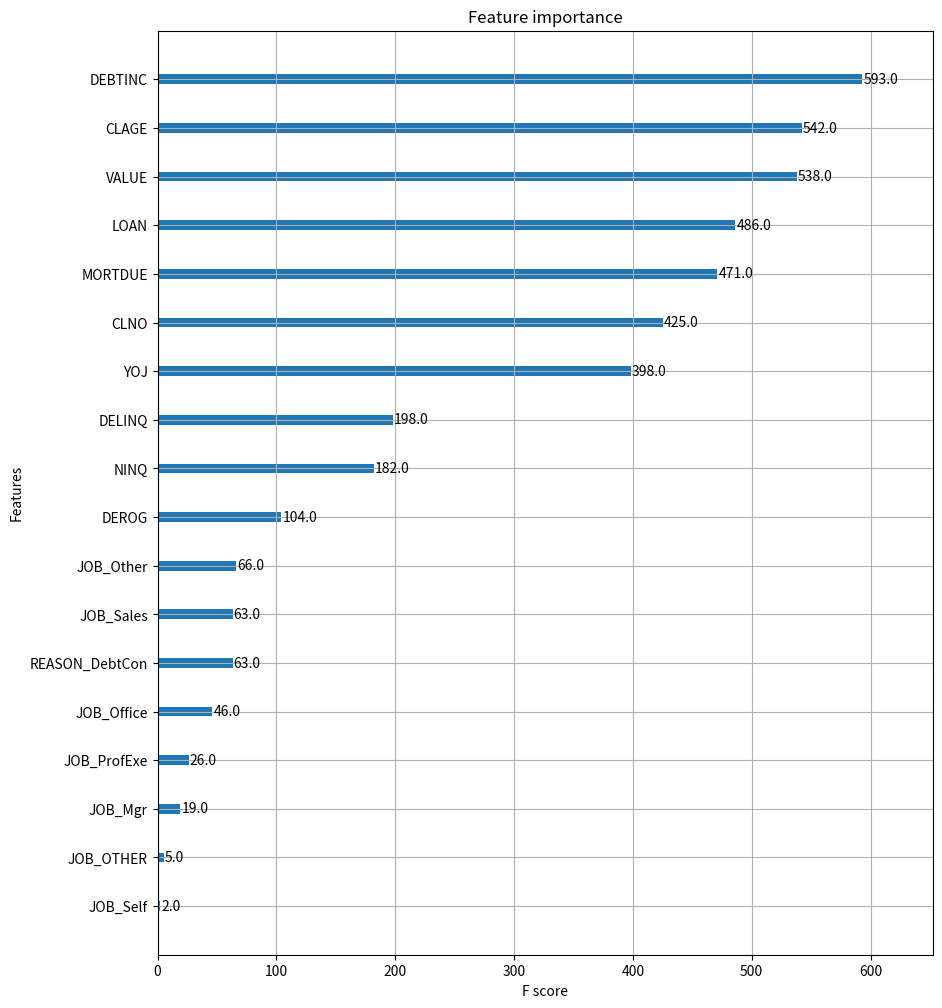

In [ ]:
# 변수 중요도 확인 
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_stop, ax=ax)

# importance_type 변경 가능
# plot_importance(xgb_stop, importance_type='gain', ax=ax)

# @LightGBM 실습

In [ ]:
# package 설치
!pip install lightgbm

In [ ]:
# LightGBM 패키지 불러오기 
from lightgbm import LGBMClassifier

# 변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [ ]:
# 기본 모델 지정 및 기본 옵션 확인
lgbm_uncust = LGBMClassifier(random_state=1234)

lgbm_uncust.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1234,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
# 모델 적합
lgbm_uncust.fit(df_train_x, df_train_y)
print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
lgbm_pred_train = lgbm_uncust.predict(df_train_x)
eval_class_model(df_train_y, lgbm_pred_train)
print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
lgbm_pred_test = lgbm_uncust.predict(df_test_x)
eval_class_model(df_test_y, lgbm_pred_test)

NameError: name 'df_train_x' is not defined

In [ ]:
# 사용자 모델 생성
lgbm_user= LGBMClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 6, random_state=1234)
# 모델 적합
lgbm_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
lgbm_pred_train = lgbm_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, lgbm_pred_train)
print('\n',classification_report(df_train_y, lgbm_pred_train))

# 예측 및 모델 평가:Test  
lgbm_pred_test = lgbm_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_test)
print('\n',classification_report(df_test_y, lgbm_pred_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 241, number of negative: 2382
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1413
[LightGBM] [Info] Number of data points in the train set: 2623, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091880 -> initscore=-2.290899
[LightGBM] [Info] Start training from score -2.290899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

In [ ]:
# sklearn lightgbm 모델의 조기 중단 : fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss
eval_df = [(df_test_x, df_test_y)]

lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6, random_state=1234)
# lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6,
#                           reg_alpha=0.2)

# 모델 성능 평가 데이터
lgbm_stop.fit(df_train_x, df_train_y,
              # 조기 중단 파라미터
              early_stopping_rounds = 200, eval_metric="logloss", eval_set = eval_df, verbose=True)

NameError: name 'df_test_x' is not defined

In [ ]:
# 최적모델 정보 확인
print("최적 횟수:",lgbm_stop.best_iteration_)  
print("최적 성능(0-LogLoss):",lgbm_stop.best_score_)  

In [ ]:
# 최적 모델 평가
lgbm_pred_stop = lgbm_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_stop)
print('\n',classification_report(df_test_y, lgbm_pred_stop))

In [ ]:
# 변수 중요도 확인 
from lightgbm import plot_importance
print(lgbm_stop.feature_name_)
print(lgbm_stop.feature_importances_)

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(lgbm_stop, ax=ax)

# @Categorical Boosting 실습

In [ ]:
# package 설치
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.9 MB/s eta 0:00:00m eta 0:00:010:00:01


In [ ]:
# 패키지 불러오기 
from catboost import CatBoostClassifier

# 변수 중요도 확인: CatBoost는 plot_importance 함수 미지원

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [ ]:
# 기본 모델 지정 및 기본 옵션 확인
cbc_uncust = CatBoostClassifier(random_state=1234)

cbc_uncust.get_all_params

<bound method CatBoost.get_all_params of <catboost.core.CatBoostClassifier object at 0x7fe4b8603af0>>

In [ ]:
# 모델 적합
cbc_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
cbc_pred_train = cbc_uncust.predict(df_train_x)
eval_class_model(df_train_y, cbc_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
cbc_pred_test = cbc_uncust.predict(df_test_x)
eval_class_model(df_test_y, cbc_pred_test)

Learning rate set to 0.015551
0:	learn: 0.6759020	total: 52.4ms	remaining: 52.4s
1:	learn: 0.6590954	total: 57.5ms	remaining: 28.7s
2:	learn: 0.6417346	total: 61.8ms	remaining: 20.5s
3:	learn: 0.6259035	total: 64.7ms	remaining: 16.1s
4:	learn: 0.6112358	total: 67.7ms	remaining: 13.5s
5:	learn: 0.5967933	total: 70.9ms	remaining: 11.7s
6:	learn: 0.5823979	total: 73.1ms	remaining: 10.4s
7:	learn: 0.5690662	total: 76.8ms	remaining: 9.52s
8:	learn: 0.5562452	total: 78.9ms	remaining: 8.69s
9:	learn: 0.5445557	total: 81.2ms	remaining: 8.04s
10:	learn: 0.5323888	total: 83.2ms	remaining: 7.48s
11:	learn: 0.5217795	total: 84.9ms	remaining: 6.99s
12:	learn: 0.5103972	total: 86.8ms	remaining: 6.59s
13:	learn: 0.5003415	total: 88.9ms	remaining: 6.26s
14:	learn: 0.4880711	total: 90.8ms	remaining: 5.96s
15:	learn: 0.4794751	total: 92.2ms	remaining: 5.67s
16:	learn: 0.4695229	total: 94.4ms	remaining: 5.46s
17:	learn: 0.4600413	total: 96.4ms	remaining: 5.26s
18:	learn: 0.4514595	total: 98.4ms	remaining

In [ ]:
# 사용자 모델 생성
cbc_user= CatBoostClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 6, random_state=1234)
# 모델 적합
cbc_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
cbc_pred_train = cbc_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, cbc_pred_train)
print('\n',classification_report(df_train_y, cbc_pred_train))


# 예측 및 모델 평가:Test  
cbc_pred_test = cbc_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_test)
print('\n',classification_report(df_test_y, cbc_pred_test))

0:	learn: 0.5895880	total: 4.12ms	remaining: 819ms
1:	learn: 0.5091634	total: 7.19ms	remaining: 712ms
2:	learn: 0.4398551	total: 10.3ms	remaining: 678ms
3:	learn: 0.3932521	total: 13.5ms	remaining: 659ms
4:	learn: 0.3564111	total: 16.1ms	remaining: 628ms
5:	learn: 0.3279758	total: 18.5ms	remaining: 598ms
6:	learn: 0.3031656	total: 21ms	remaining: 579ms
7:	learn: 0.2859799	total: 23.3ms	remaining: 560ms
8:	learn: 0.2719461	total: 25.4ms	remaining: 540ms
9:	learn: 0.2596109	total: 28ms	remaining: 532ms
10:	learn: 0.2479861	total: 30.1ms	remaining: 518ms
11:	learn: 0.2373933	total: 32.3ms	remaining: 505ms
12:	learn: 0.2304581	total: 34.5ms	remaining: 496ms
13:	learn: 0.2233018	total: 36.4ms	remaining: 484ms
14:	learn: 0.2165182	total: 38.3ms	remaining: 472ms
15:	learn: 0.2111991	total: 40.2ms	remaining: 462ms
16:	learn: 0.2058462	total: 42.2ms	remaining: 454ms
17:	learn: 0.2011073	total: 44.4ms	remaining: 449ms
18:	learn: 0.1966342	total: 46.5ms	remaining: 443ms
19:	learn: 0.1922019	total

In [ ]:
# CatBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

cbc_stop = CatBoostClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=1234)

cbc_stop.fit(df_train_x, df_train_y, 
            # 조기 중단 파라미터
             early_stopping_rounds = 150,eval_set = eval_df, verbose=True)
# cbc_stop.fit(df_train_x, df_train_y, 
#             # 조기 중단 파라미터
#              early_stopping_rounds = 150, eval_metric="auto", eval_set = eval_df, 
#              verbose=True)

0:	learn: 0.5895880	test: 0.5902351	best: 0.5902351 (0)	total: 4.28ms	remaining: 1.28s
1:	learn: 0.5091634	test: 0.5100842	best: 0.5100842 (1)	total: 7.93ms	remaining: 1.18s
2:	learn: 0.4398551	test: 0.4418896	best: 0.4418896 (2)	total: 11.4ms	remaining: 1.13s
3:	learn: 0.3932521	test: 0.3958245	best: 0.3958245 (3)	total: 14.7ms	remaining: 1.09s
4:	learn: 0.3564111	test: 0.3607410	best: 0.3607410 (4)	total: 18ms	remaining: 1.06s
5:	learn: 0.3279758	test: 0.3330988	best: 0.3330988 (5)	total: 21ms	remaining: 1.03s
6:	learn: 0.3031656	test: 0.3108044	best: 0.3108044 (6)	total: 23.7ms	remaining: 992ms
7:	learn: 0.2859799	test: 0.2944782	best: 0.2944782 (7)	total: 27.3ms	remaining: 995ms
8:	learn: 0.2719461	test: 0.2813353	best: 0.2813353 (8)	total: 29.5ms	remaining: 954ms
9:	learn: 0.2596109	test: 0.2715156	best: 0.2715156 (9)	total: 31.8ms	remaining: 923ms
10:	learn: 0.2479861	test: 0.2615659	best: 0.2615659 (10)	total: 34.1ms	remaining: 897ms
11:	learn: 0.2373933	test: 0.2529267	best: 0.

In [ ]:
# 최적모델 정보 확인
print("최적 횟수:",cbc_stop.best_iteration_)  
print("최적 성능:",cbc_stop.best_score_)

최적 횟수: 146
최적 성능: {'learn': {'Logloss': 0.02070902601602369}, 'validation': {'Logloss': 0.17319528463292921}}


In [ ]:
# 조기 중단 예측 및 모델 평가:Test  
cbc_pred_stop = cbc_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_stop)
print('\n',classification_report(df_test_y, cbc_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1021    0]
 [  58   46]] 

정확도: 0.9484
정밀도: 1.0000
재현율: 0.4423
F1    : 0.6133
AUC   : 0.7212

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1021
           1       1.00      0.44      0.61       104

    accuracy                           0.95      1125
   macro avg       0.97      0.72      0.79      1125
weighted avg       0.95      0.95      0.94      1125



In [ ]:
# 변수 중요도 확인 
print(cbc_stop.feature_names_)
print(cbc_stop.feature_importances_)
# print(cbc_stop.get_feature_importance())

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_OTHER', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[ 7.79626222  6.71452248 10.94129565  9.04995146  3.39982106  7.33736541
 12.74832299  6.56386565 10.05770011 14.1016896   1.98517218  0.95257086
  1.54087824  0.22338934  2.38539442  2.41853656  0.68400127  0.93324119
  0.16601932]


In [ ]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_cbc_importance = pd.DataFrame()
df_cbc_importance ["Feature"] = cbc_stop.feature_names_
df_cbc_importance ["Importance"] = cbc_stop.feature_importances_
# 중요도별로 정렬
df_cbc_importance .sort_values("Importance", ascending=False, inplace = True)
df_cbc_importance .round(3)

,Feature,Importance
9,DEBTINC,14.102
6,CLAGE,12.748
2,VALUE,10.941
8,CLNO,10.058
3,YOJ,9.050
0,LOAN,7.796
5,DELINQ,7.337
1,MORTDUE,6.715
7,NINQ,6.564
4,DEROG,3.400


Text(0, 0.5, '설명변수')

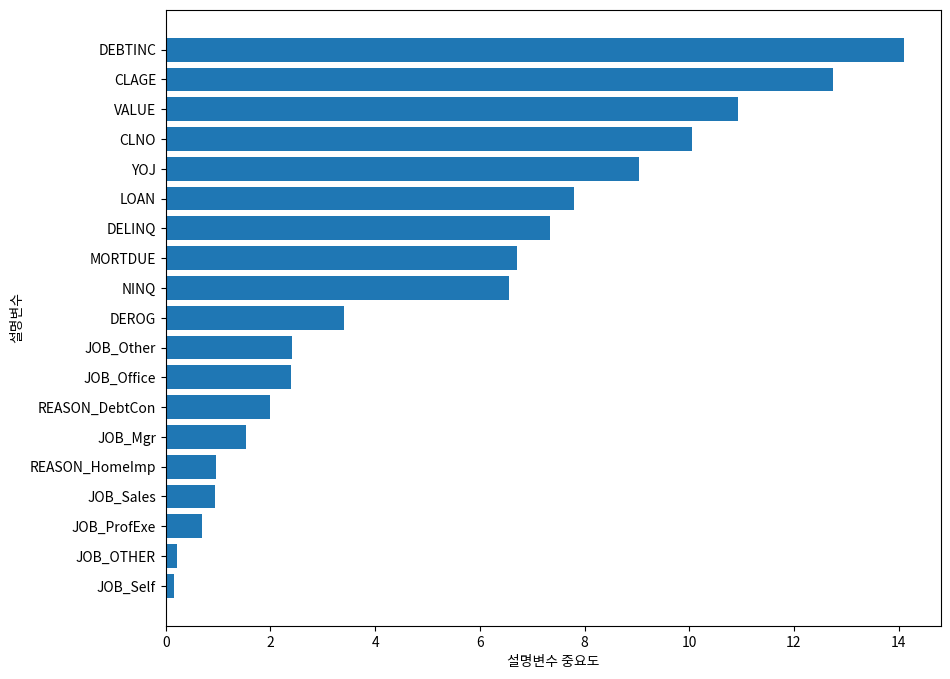

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
fig, ax = plt.subplots(figsize=(10, 8))

df_cbc_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_cbc_importance ))
plt.barh(y = coordinates, width = df_cbc_importance ["Importance"])
plt.yticks(coordinates, df_cbc_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")